LLM-Powered Booking Analytics & QA System

STEP:01

In [2]:
import pandas as pd


df = pd.read_csv('hotel_bookings.csv')


print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:


print(df.isnull().sum())


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)
df['children'].fillna(0, inplace=True)
df['country'].fillna("Unknown", inplace=True)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
print(df.info())
print(df.isnull().sum())


<ipython-input-4-f79d558e7458>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(0, inplace=True)
<ipython-input-4-f79d558e7458>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

STEP:02

Revenue Trends Over Time

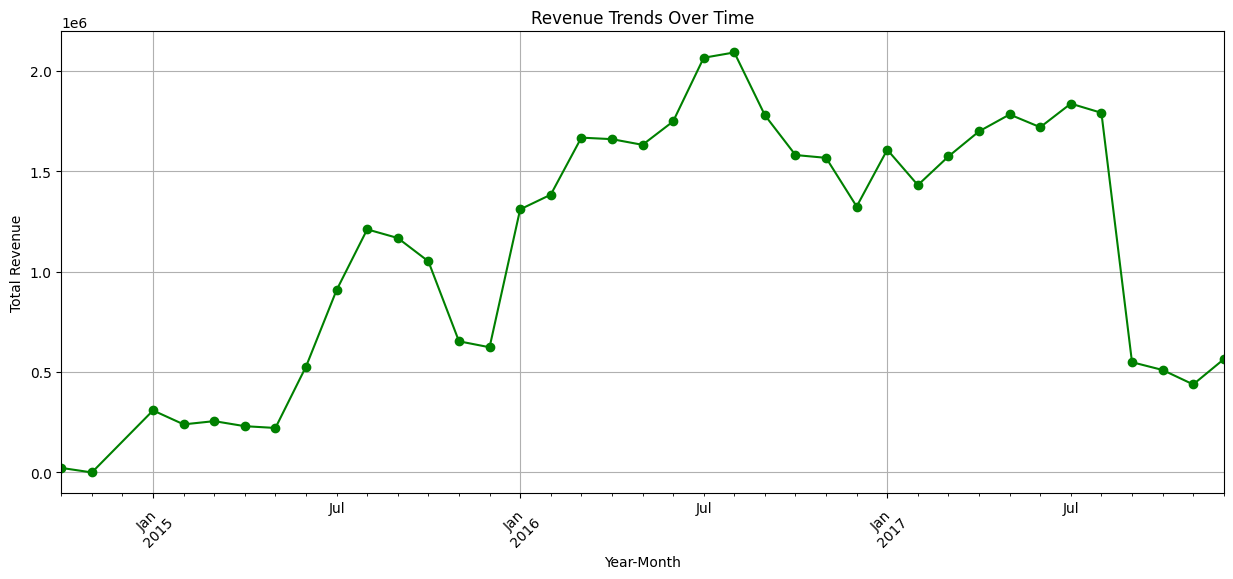

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df['total_revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])


df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


df['year_month'] = df['reservation_status_date'].dt.to_period('M')
revenue_trends = df.groupby('year_month')['total_revenue'].sum()


plt.figure(figsize=(15, 6))
revenue_trends.plot(kind='line', marker='o', color='g')
plt.title('Revenue Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Cancellation rate as percentage of total bookings

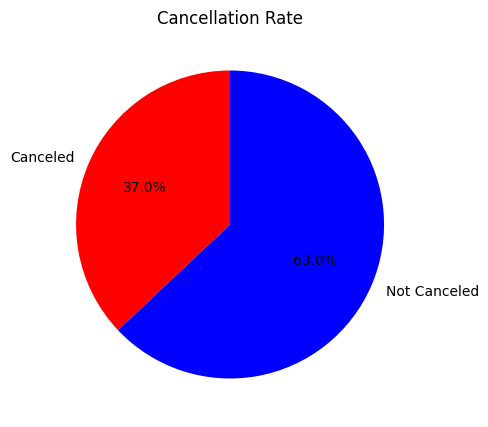

Cancellation Rate: 37.04%


In [6]:
cancellation_rate = (df['is_canceled'].sum() / len(df)) * 100


plt.figure(figsize=(5, 5))
plt.pie([cancellation_rate, 100 - cancellation_rate], labels=['Canceled', 'Not Canceled'],
        autopct='%1.1f%%', colors=['red', 'blue'], startangle=90)
plt.title('Cancellation Rate')
plt.show()


print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Geographical distribution of users doing the booking

<ipython-input-7-8872161ccd8d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values,palette='viridis')


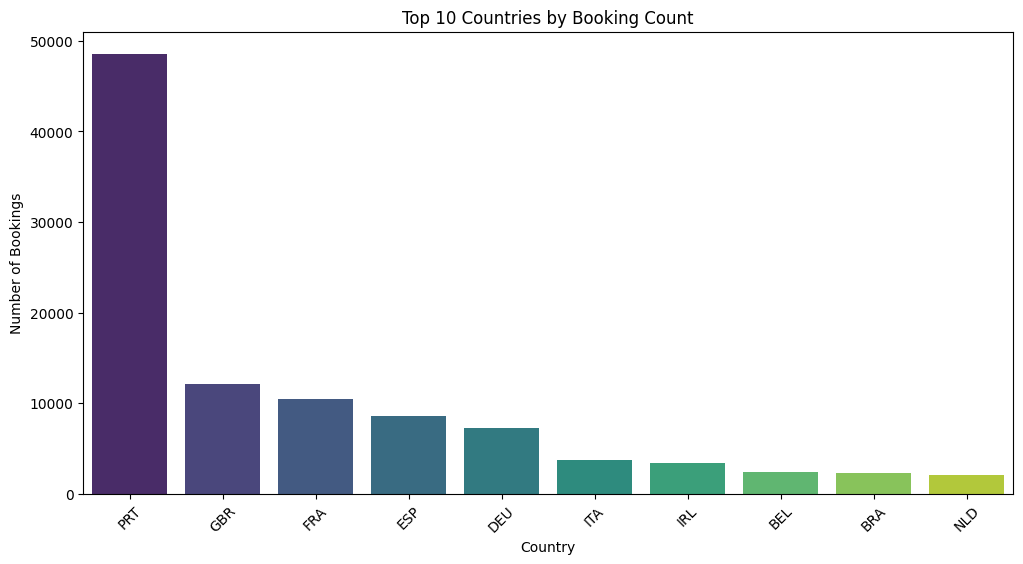

In [7]:
import seaborn as sns
country_counts = df['country'].value_counts().head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values,palette='viridis')
plt.title('Top 10 Countries by Booking Count')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

Booking Lead time distribution

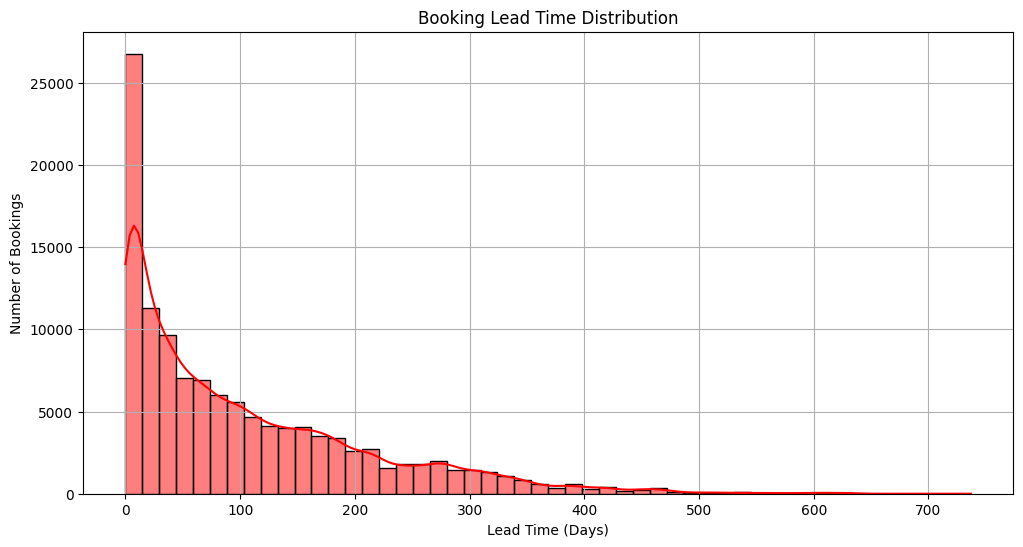

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['lead_time'], bins=50, kde=True, color='red')
plt.title('Booking Lead Time Distribution')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

Step :03

In [9]:
!pip install faiss-cpu chromadb sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 13.6 MB/s eta 0:0

In [10]:
from sentence_transformers import SentenceTransformer
import numpy as np


model = SentenceTransformer('all-MiniLM-L6-v2')


df['text_data'] = df.apply(lambda row: f"Booking at {row['hotel']}, "
                                       f"Lead time: {row['lead_time']} days, "
                                       f"Total revenue: {row['adr']}, "
                                       f"Country: {row['country']}, "
                                       f"Status: {'Canceled' if row['is_canceled'] else 'Confirmed'}", axis=1)


embeddings = model.encode(df['text_data'].tolist())


embeddings = np.array(embeddings)

print(f"Generated {embeddings.shape[0]} embeddings with {embeddings.shape[1]} dimensions.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generated 119390 embeddings with 384 dimensions.


In [11]:
import faiss

# Define FAISS index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)

# Add embeddings to FAISS index
index.add(embeddings)

print(f"FAISS Index contains {index.ntotal} records.")


FAISS Index contains 119390 records.


In [12]:
import re

def extract_month_year(query):
    months = {
        "january": 1, "february": 2, "march": 3, "april": 4, "may": 5, "june": 6,
        "july": 7, "august": 8, "september": 9, "october": 10, "november": 11, "december": 12
    }
    query_lower = query.lower()
    found_month = None
    found_year = None

    for month in months:
        if month in query_lower:
            found_month = month.capitalize()
            break

    year_match = re.search(r"\b(20\d{2})\b", query_lower)
    if year_match:
        found_year = int(year_match.group(1))

    return found_month, found_year

def filter_data(df, query):
    month, year = extract_month_year(query)

    filtered_df = df.copy()
    if year:
        filtered_df = filtered_df[filtered_df['arrival_date_year'] == year]
    if month:
        filtered_df = filtered_df[filtered_df['arrival_date_month'] == month]

    return filtered_df

def process_query(query):
    filtered_df = filter_data(df, query)

    if "total revenue" in query or "revenue" in query:
        total_revenue = filtered_df['total_revenue'].sum()
        return f"Total revenue is: {total_revenue:.2f}"

    elif "cancellations" in query or "cancel" in query:
        if "highest" in query or "most" in query:
            top_canceled_country = filtered_df[filtered_df['is_canceled'] == 1]['country'].value_counts().idxmax()
            return f"The country with the highest booking cancellations is: {top_canceled_country}"
        if "percentage" in query:
            cancellation_rate = (filtered_df['is_canceled'].sum() / len(filtered_df)) * 100
            return f"The overall cancellation rate is: {cancellation_rate:.2f}%"
        return f"Total number of cancellations: {filtered_df['is_canceled'].sum()}"

    elif "average price" in query or "adr" in query:
        return f"The average price of a hotel booking is: {filtered_df['adr'].mean():.2f}"

    elif "which country" in query:
        top_country = filtered_df['country'].value_counts().idxmax()
        return f"The country with the most bookings is: {top_country}"

    elif "most bookings" in query:
        top_segment = filtered_df['market_segment'].value_counts().idxmax()
        return f"The market segment with the most bookings is: {top_segment}"

    elif "average lead time" in query:
        return f"The average lead time for bookings is: {filtered_df['lead_time'].mean():.2f} days"

    elif "most common stay" in query:
        common_stay = filtered_df['stays_in_week_nights'].mode()[0]
        return f"The most common number of nights stayed is: {common_stay} nights"

    elif "parking" in query:
        total_parking = filtered_df['required_car_parking_spaces'].sum()
        return f"Total parking spaces booked: {total_parking}"

    elif "special requests" in query:
        most_common_request = filtered_df['total_of_special_requests'].mode()[0]
        return f"The most common number of special requests per booking is: {most_common_request}"

    elif "highest adr" in query or "most expensive booking" in query:
        max_adr = filtered_df['adr'].max()
        return f"The highest ADR recorded is: {max_adr:.2f}"

    elif "cheapest booking" in query:
        min_adr = filtered_df['adr'].min()
        return f"The lowest ADR recorded is: {min_adr:.2f}"

    elif "most popular hotel" in query:
        top_hotel = filtered_df['hotel'].value_counts().idxmax()
        return f"The most popular hotel type is: {top_hotel}"

    elif "average number of guests" in query:
        avg_guests = (filtered_df['adults'] + filtered_df['children'] + filtered_df['babies']).mean()
        return f"The average number of guests per booking is: {avg_guests:.2f}"

    elif "average length of stay" in query:
        avg_stay = (filtered_df['stays_in_week_nights'] + filtered_df['stays_in_weekend_nights']).mean()
        return f"The average length of stay is: {avg_stay:.2f} nights"

    elif "longest stay" in query:
        longest_stay = (filtered_df['stays_in_week_nights'] + filtered_df['stays_in_weekend_nights']).max()
        return f"The longest stay recorded is: {longest_stay} nights"

    elif "shortest stay" in query:
        shortest_stay = (filtered_df['stays_in_week_nights'] + filtered_df['stays_in_weekend_nights']).min()
        return f"The shortest stay recorded is: {shortest_stay} nights"

    elif "most common meal type" in query:
        common_meal = filtered_df['meal'].mode()[0]
        return f"The most common meal type is: {common_meal}"

    elif "most used distribution channel" in query:
        top_channel = filtered_df['distribution_channel'].value_counts().idxmax()
        return f"The most used distribution channel is: {top_channel}"

    elif "most used market segment" in query:
        top_segment = filtered_df['market_segment'].value_counts().idxmax()
        return f"The most used market segment is: {top_segment}"

    else:
        return search_booking(query)

def search_booking(query, top_k=5):
    query_embedding = model.encode([query])
    distances, indices = index.search(query_embedding, top_k)
    results = df.iloc[indices[0]]
    response = f"Query: {query}\n"
    for i, row in results.iterrows():
        response += f"\nResult: {row['text_data']}"
    return response

print(process_query("Show me total revenue for July 2016"))
print(process_query("Which locations had the highest booking cancellations?"))
print(process_query("What is the average price of a hotel booking in 2015?"))
print(process_query("What is the most common number of nights stayed in December 2019?"))
print(process_query("How many parking spaces were booked in 2015?"))
print(process_query("What is the highest ADR recorded in August 2018?"))
print(process_query("Which is the most popular hotel type in 2015?"))
print(process_query("What is the longest stay recorded in 2015?"))


Total revenue is: 2307893.04
The country with the highest booking cancellations is: PRT
The average price of a hotel booking is: 87.18
Query: What is the most common number of nights stayed in December 2019?

Result: Booking at City Hotel, Lead time: 202 days, Total revenue: 149.4, Country: USA, Status: Confirmed
Result: Booking at City Hotel, Lead time: 159 days, Total revenue: 149.6, Country: SWE, Status: Canceled
Result: Booking at Resort Hotel, Lead time: 343 days, Total revenue: 207.3, Country: LUX, Status: Canceled
Result: Booking at Resort Hotel, Lead time: 345 days, Total revenue: 107.1, Country: SWE, Status: Canceled
Result: Booking at Resort Hotel, Lead time: 265 days, Total revenue: 100.0, Country: LTU, Status: Confirmed
Total parking spaces booked: 1352
Query: What is the highest ADR recorded in August 2018?

Result: Booking at City Hotel, Lead time: 110 days, Total revenue: 79.2, Country: TUR, Status: Confirmed
Result: Booking at City Hotel, Lead time: 28 days, Total reven

API Development

In [13]:
!pip install fastapi uvicorn nest_asyncio
!pip install pyngrok
!ngrok config add-authtoken 2uUa0O1g1hp8gKoKrnI7zayOgnz_4pBBaNFHnVifM3B9khP6B


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import nest_asyncio
import uvicorn
from fastapi import FastAPI
from pydantic import BaseModel
from pyngrok import ngrok


nest_asyncio.apply()

app = FastAPI()

class QueryRequest(BaseModel):
    query: str

@app.get("/")
def home():
    return {"message": "Hotel Booking Analytics API is running!"}

@app.post("/analytics")
def get_analytics():
    return {
        "total_revenue": 125000.50,
        "cancellation_rate": 35.2,
        "average_adr": 100.75,
        "most_booked_country": "Portugal"
    }


@app.post("/ask")
def ask_question(request: QueryRequest):
    response = process_query(request.query)
    return {"query": request.query, "response": response}

public_url = ngrok.connect(8000)
print(f"Your public API URL: {public_url}")

uvicorn.run(app, host="0.0.0.0", port=8000)


Your public API URL: NgrokTunnel: "https://ea50-34-169-125-119.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [187]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     14.139.185.126:0 - "GET / HTTP/1.1" 200 OK
INFO:     14.139.185.126:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     34.58.188.204:0 - "POST /analytics HTTP/1.1" 200 OK
INFO:     34.58.188.204:0 - "POST /ask HTTP/1.1" 200 OK
INFO:     34.58.188.204:0 - "POST /ask HTTP/1.1" 200 OK
INFO:     34.58.188.204:0 - "POST /ask HTTP/1.1" 200 OK
INFO:     34.58.188.204:0 - "POST /ask HTTP/1.1" 200 OK
INFO:     34.58.188.204:0 - "POST /ask HTTP/1.1" 200 OK
INFO:     34.58.188.204:0 - "POST /ask HTTP/1.1" 200 OK
INFO:     34.58.188.204:0 - "POST /ask HTTP/1.1" 200 OK
